In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#da=pd.read_excel(path,sep='\t')
data=pd.read_csv(r'C:\Users\SUNATH\Desktop\four1 practicle\bioinformatics\cancer_immunotherapy.csv')
data.head()

,PatientID,Age,Gender,TumorType,ImmunotherapyType,BiomarkerExpressionLevel,TreatmentResponse,SurvivalInMonths,Relapse,MutationCount
0,P001,45,F,Lung,PD-1 Inhibitor,High,Partial Response,12,Yes,150
1,P002,67,M,Breast,CTLA-4 Inhibitor,Low,Stable Disease,20,No,320
2,P003,55,F,Melanoma,PD-L1 Inhibitor,Medium,Complete Response,36,No,50
3,P004,70,M,Lung,PD-1 Inhibitor,High,Progressive Disease,10,Yes,200
4,P005,38,F,Lung,CTLA-4 Inhibitor,Medium,Partial Response,24,No,80


In [42]:
data.iloc[:,:]

,PatientID,Age,Gender,TumorType,ImmunotherapyType,BiomarkerExpressionLevel,TreatmentResponse,SurvivalInMonths,Relapse,MutationCount
0,P001,45,F,Lung,PD-1 Inhibitor,High,Partial Response,12,Yes,150
1,P002,67,M,Breast,CTLA-4 Inhibitor,Low,Stable Disease,20,No,320
2,P003,55,F,Melanoma,PD-L1 Inhibitor,Medium,Complete Response,36,No,50
3,P004,70,M,Lung,PD-1 Inhibitor,High,Progressive Disease,10,Yes,200
4,P005,38,F,Lung,CTLA-4 Inhibitor,Medium,Partial Response,24,No,80
5,P006,60,F,Melanoma,PD-L1 Inhibitor,High,Stable Disease,30,Yes,220
6,P007,72,M,Breast,PD-1 Inhibitor,Low,Progressive Disease,8,Yes,400
7,P008,50,F,Melanoma,CTLA-4 Inhibitor,Medium,Complete Response,48,No,180
8,P009,65,M,Lung,PD-L1 Inhibitor,High,Stable Disease,14,No,250
9,P010,42,F,Breast,PD-1 Inhibitor,Low,Partial Response,16,Yes,300


In [43]:
data[data['ImmunotherapyType']=='PD-1 Inhibitor'].PatientID

0    P001
3    P004
6    P007
9    P010
Name: PatientID, dtype: object

In [44]:
data[data['TreatmentResponse']=='Complete Response'].SurvivalInMonths.mean()

42.0

In [45]:
data[(data['BiomarkerExpressionLevel']=='High') | (data['BiomarkerExpressionLevel']=='Low')]

,PatientID,Age,Gender,TumorType,ImmunotherapyType,BiomarkerExpressionLevel,TreatmentResponse,SurvivalInMonths,Relapse,MutationCount
0,P001,45,F,Lung,PD-1 Inhibitor,High,Partial Response,12,Yes,150
1,P002,67,M,Breast,CTLA-4 Inhibitor,Low,Stable Disease,20,No,320
3,P004,70,M,Lung,PD-1 Inhibitor,High,Progressive Disease,10,Yes,200
5,P006,60,F,Melanoma,PD-L1 Inhibitor,High,Stable Disease,30,Yes,220
6,P007,72,M,Breast,PD-1 Inhibitor,Low,Progressive Disease,8,Yes,400
8,P009,65,M,Lung,PD-L1 Inhibitor,High,Stable Disease,14,No,250
9,P010,42,F,Breast,PD-1 Inhibitor,Low,Partial Response,16,Yes,300


In [46]:
data[data['Relapse']=='Yes'].PatientID.count()

5

In [47]:
data['MutationDensity']=data['MutationCount']/data['Age']
data.MutationDensity

0    3.333333
1    4.776119
2    0.909091
3    2.857143
4    2.105263
5    3.666667
6    5.555556
7    3.600000
8    3.846154
9    7.142857
Name: MutationDensity, dtype: float64

In [48]:
data[data['TumorType']=='Lung'].MutationCount.sum()

680

In [49]:
data.sort_values(by='SurvivalInMonths',ascending=False)

,PatientID,Age,Gender,TumorType,ImmunotherapyType,BiomarkerExpressionLevel,TreatmentResponse,SurvivalInMonths,Relapse,MutationCount,MutationDensity
7,P008,50,F,Melanoma,CTLA-4 Inhibitor,Medium,Complete Response,48,No,180,3.600000
2,P003,55,F,Melanoma,PD-L1 Inhibitor,Medium,Complete Response,36,No,50,0.909091
5,P006,60,F,Melanoma,PD-L1 Inhibitor,High,Stable Disease,30,Yes,220,3.666667
4,P005,38,F,Lung,CTLA-4 Inhibitor,Medium,Partial Response,24,No,80,2.105263
1,P002,67,M,Breast,CTLA-4 Inhibitor,Low,Stable Disease,20,No,320,4.776119
9,P010,42,F,Breast,PD-1 Inhibitor,Low,Partial Response,16,Yes,300,7.142857
8,P009,65,M,Lung,PD-L1 Inhibitor,High,Stable Disease,14,No,250,3.846154
0,P001,45,F,Lung,PD-1 Inhibitor,High,Partial Response,12,Yes,150,3.333333
3,P004,70,M,Lung,PD-1 Inhibitor,High,Progressive Disease,10,Yes,200,2.857143
6,P007,72,M,Breast,PD-1 Inhibitor,Low,Progressive Disease,8,Yes,400,5.555556


In [50]:
maxvalue=data['MutationCount'].max()
y=data[data['MutationCount']==maxvalue]
y[['PatientID','SurvivalInMonths']]

,PatientID,SurvivalInMonths
6,P007,8


In [51]:
data[(data['Age']>60) & (data['TreatmentResponse']=='Stable Disease')]

,PatientID,Age,Gender,TumorType,ImmunotherapyType,BiomarkerExpressionLevel,TreatmentResponse,SurvivalInMonths,Relapse,MutationCount,MutationDensity
1,P002,67,M,Breast,CTLA-4 Inhibitor,Low,Stable Disease,20,No,320,4.776119
8,P009,65,M,Lung,PD-L1 Inhibitor,High,Stable Disease,14,No,250,3.846154


In [52]:
data[data['Relapse']=='No'].MutationCount.mean()

176.0

In [59]:
data.groupby('TumorType')['SurvivalInMonths'].mean()

TumorType
Breast      14.666667
Lung        15.000000
Melanoma    38.000000
Name: SurvivalInMonths, dtype: float64

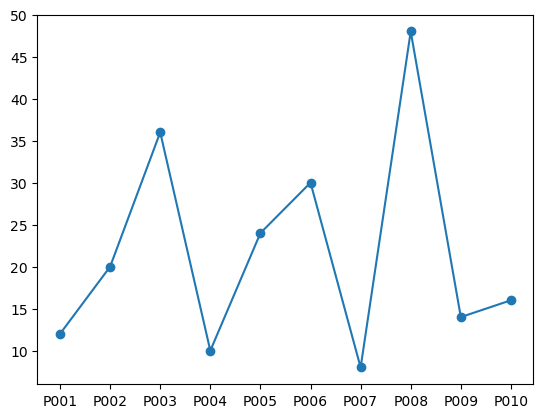

In [62]:
plt.plot(data['PatientID'],data['SurvivalInMonths'])
plt.scatter(data['PatientID'],data['SurvivalInMonths'])
plt.show()

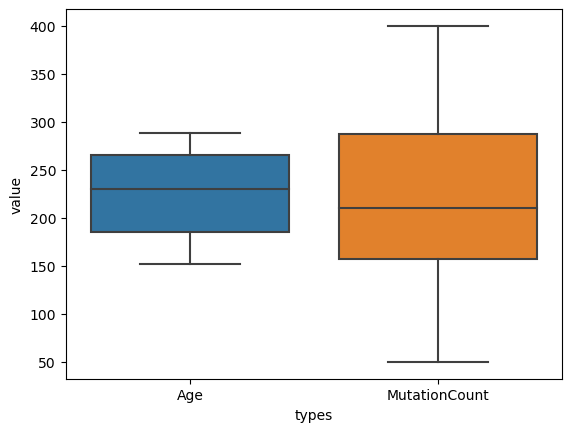

In [68]:
sns.boxplot(data=[data.Age*4,data.MutationCount])
plt.xticks([0,1],['Age','MutationCount'])
plt.xlabel('types')
plt.ylabel('value')
plt.show()

In [71]:
#heatdataset=data[['Age','SurvivalInMonths','MutationCount','MutationDensity']]
heatdataset=data['Age']
heatdataset=pd.concat([heatdataset,data.SurvivalInMonths,data.MutationCount,data.MutationDensity],axis=1)
heatdataset

,Age,SurvivalInMonths,MutationCount,MutationDensity
0,45,12,150,3.333333
1,67,20,320,4.776119
2,55,36,50,0.909091
3,70,10,200,2.857143
4,38,24,80,2.105263
5,60,30,220,3.666667
6,72,8,400,5.555556
7,50,48,180,3.600000
8,65,14,250,3.846154
9,42,16,300,7.142857


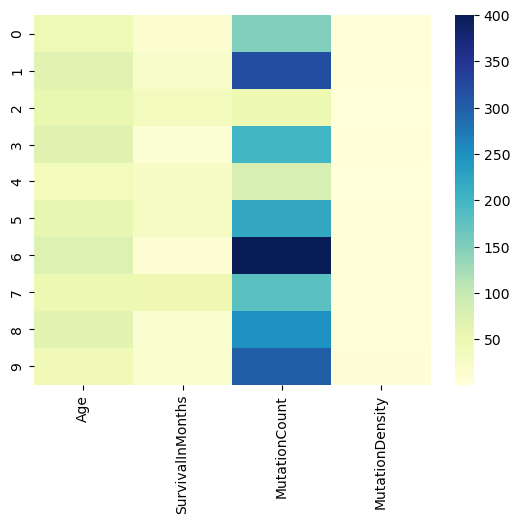

In [100]:
sns.heatmap(heatdataset,cmap='YlGnBu')
plt.show()

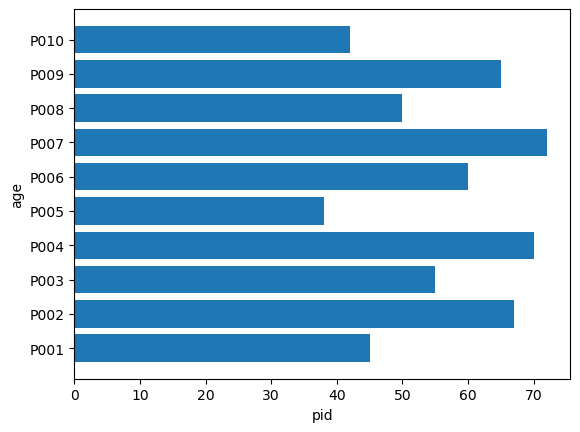

In [101]:
plt.barh(data.PatientID,data.Age)
plt.xlabel('pid')
plt.ylabel('age')
plt.show()

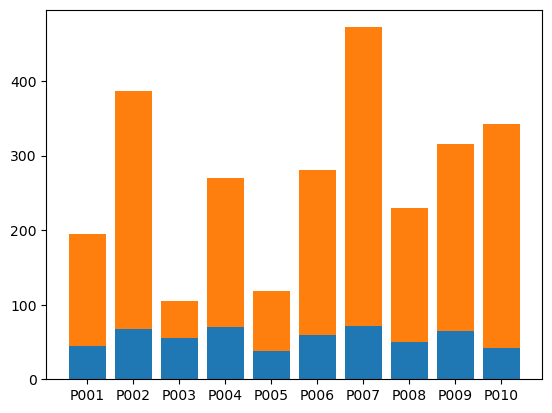

In [102]:
plt.bar(data.PatientID,data.Age)
plt.bar(data.PatientID,data.MutationCount,bottom=data.Age)
plt.show()

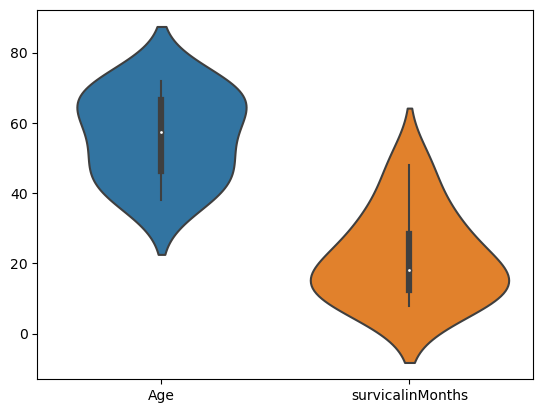

In [103]:
sns.violinplot(data=[data.Age,data.SurvivalInMonths])
plt.xticks([0,1],['Age','survicalinMonths'])
plt.show()

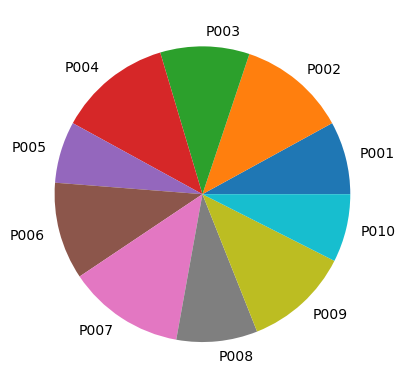

In [104]:
plt.pie(data.Age,labels=data.PatientID)
plt.show()

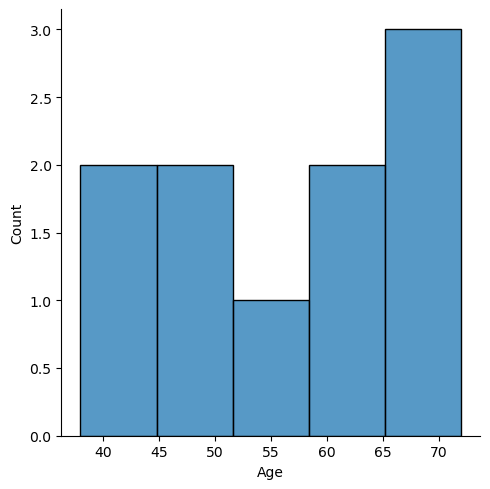

In [110]:
sns.displot(data.Age)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


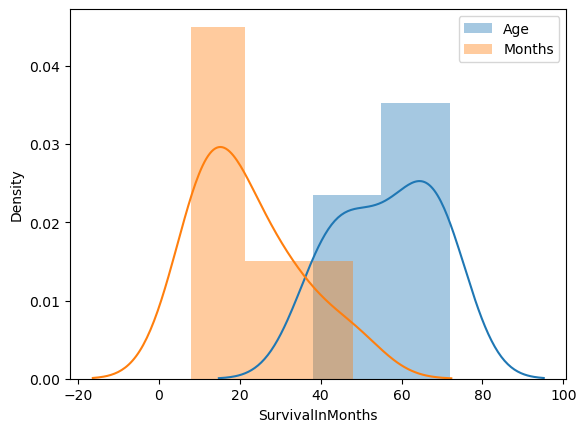

In [112]:
sns.distplot(data.Age,label='Age')
sns.distplot(data.SurvivalInMonths,label='Months')
plt.legend()
plt.show()

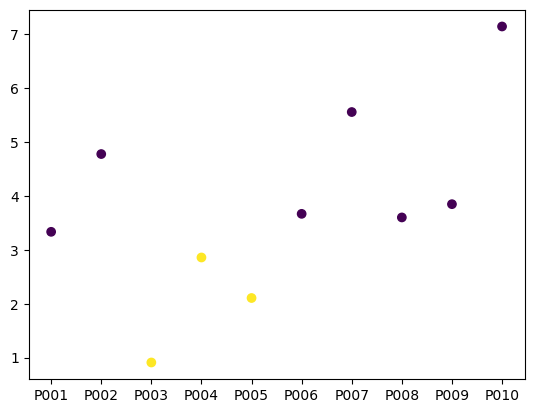

In [126]:
plt.scatter(data.PatientID,data.MutationDensity,c=data.MutationDensity<3.15)
plt.show()